DESCRIPTION

**Background of Problem Statement :**

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

**Domain:** Entertainment

**Analysis Tasks to be performed:**

- Import the three datasets
- Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
- Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
- User Age Distribution
- User rating of the movie “Toy Story”
- Top 25 movies by viewership rating
- Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
movies_df=pd.read_csv('G:\My Drive\Assignments\Part1-Python essential\Assesment_2\\movies.dat',encoding='ISO-8859-1',delimiter='::',header=None,
                      names=['MovieID','Title','Genres'])
ratings_df=pd.read_csv('G:\My Drive\Assignments\Part1-Python essential\Assesment_2\\ratings.dat',encoding='ISO-8859-1',delimiter='::',header=None,
                       names=['UserID','MovieID','Rating','Timestamp'])
users_df=pd.read_csv('G:\My Drive\Assignments\Part1-Python essential\Assesment_2\\users.dat',encoding='ISO-8859-1',delimiter='::',header=None,
                     names=['UserID','Gender','Age','Occupation','Zip-code'])

# Creating master data

In [6]:
movies_df=movies_df.set_index(['MovieID'])
ratings_df=ratings_df.set_index(['MovieID'])

In [7]:
movies_df=movies_df.sort_values(by='MovieID')
ratings_df=ratings_df.sort_values(by='MovieID')

In [8]:
movies_df

,Title,Genres
MovieID,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [9]:
ratings_df

,UserID,Rating,Timestamp
MovieID,,,
1,2599,4,973796689
1,18,4,978154768
1,4089,5,965428947
1,3626,4,966594018
1,2873,5,972784317
...,...,...,...
3952,551,4,976067330
3952,1544,4,974742620
3952,1130,3,975593522


In [10]:
pd.merge(movies_df, ratings_df, left_index=True, right_index=True)

,Title,Genres,UserID,Rating,Timestamp
MovieID,,,,,
1,Toy Story (1995),Animation|Children's|Comedy,2599,4,973796689
1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768
1,Toy Story (1995),Animation|Children's|Comedy,4089,5,965428947
1,Toy Story (1995),Animation|Children's|Comedy,3626,4,966594018
1,Toy Story (1995),Animation|Children's|Comedy,2873,5,972784317
...,...,...,...,...,...
3952,"Contender, The (2000)",Drama|Thriller,551,4,976067330
3952,"Contender, The (2000)",Drama|Thriller,1544,4,974742620
3952,"Contender, The (2000)",Drama|Thriller,1130,3,975593522


In [11]:
data1=pd.merge(movies_df, ratings_df, left_index=True, right_index=True)

In [12]:
users_df=users_df.set_index(['UserID'])
ratings_df1=ratings_df.set_index(['UserID'])

In [13]:
users_df=users_df.sort_values(by='UserID')
ratings_df1=ratings_df1.sort_values(by='UserID')

In [14]:
users_df

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [15]:
ratings_df1

,Rating,Timestamp
UserID,,
1,4,978302039
1,4,978824291
1,5,978300172
1,4,978302188
1,5,978301777
...,...,...
6040,3,960972782
6040,4,964828652
6040,5,956715569


In [16]:
pd.merge(users_df, ratings_df1, left_index=True, right_index=True)

,Gender,Age,Occupation,Zip-code,Rating,Timestamp
UserID,,,,,,
1,F,1,10,48067,4,978302039
1,F,1,10,48067,4,978824291
1,F,1,10,48067,5,978300172
1,F,1,10,48067,4,978302188
1,F,1,10,48067,5,978301777
...,...,...,...,...,...,...
6040,M,25,6,11106,3,960972782
6040,M,25,6,11106,4,964828652
6040,M,25,6,11106,5,956715569


In [17]:
data2=pd.merge(users_df, ratings_df1, left_index=True, right_index=True)

In [18]:
data1

,Title,Genres,UserID,Rating,Timestamp
MovieID,,,,,
1,Toy Story (1995),Animation|Children's|Comedy,2599,4,973796689
1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768
1,Toy Story (1995),Animation|Children's|Comedy,4089,5,965428947
1,Toy Story (1995),Animation|Children's|Comedy,3626,4,966594018
1,Toy Story (1995),Animation|Children's|Comedy,2873,5,972784317
...,...,...,...,...,...
3952,"Contender, The (2000)",Drama|Thriller,551,4,976067330
3952,"Contender, The (2000)",Drama|Thriller,1544,4,974742620
3952,"Contender, The (2000)",Drama|Thriller,1130,3,975593522


In [19]:
data2

,Gender,Age,Occupation,Zip-code,Rating,Timestamp
UserID,,,,,,
1,F,1,10,48067,4,978302039
1,F,1,10,48067,4,978824291
1,F,1,10,48067,5,978300172
1,F,1,10,48067,4,978302188
1,F,1,10,48067,5,978301777
...,...,...,...,...,...,...
6040,M,25,6,11106,3,960972782
6040,M,25,6,11106,4,964828652
6040,M,25,6,11106,5,956715569


In [20]:
data2_mod=data2[['Age','Occupation']]

In [21]:
data2_mod

,Age,Occupation
UserID,,
1,1,10
1,1,10
1,1,10
1,1,10
1,1,10
...,...,...
6040,25,6
6040,25,6
6040,25,6


In [22]:
data1=data1[data1.columns.drop(['Genres', 'Timestamp'])]

In [23]:
data1

,Title,UserID,Rating
MovieID,,,
1,Toy Story (1995),2599,4
1,Toy Story (1995),18,4
1,Toy Story (1995),4089,5
1,Toy Story (1995),3626,4
1,Toy Story (1995),2873,5
...,...,...,...
3952,"Contender, The (2000)",551,4
3952,"Contender, The (2000)",1544,4
3952,"Contender, The (2000)",1130,3


In [24]:
master_data=pd.merge(data1, data2_mod, left_index=True, right_index=True)

In [25]:
data1.to_csv('data1.csv', index=True);
data2_mod.to_csv('data2.csv', index=True)

In [26]:
master_data

,Title,UserID,Rating,Age,Occupation
1,Toy Story (1995),2599,4,1,10
1,Toy Story (1995),2599,4,1,10
1,Toy Story (1995),2599,4,1,10
1,Toy Story (1995),2599,4,1,10
1,Toy Story (1995),2599,4,1,10
...,...,...,...,...,...
3952,"Contender, The (2000)",2177,5,45,1
3952,"Contender, The (2000)",2177,5,45,1
3952,"Contender, The (2000)",2177,5,45,1
3952,"Contender, The (2000)",2177,5,45,1


# EDA

In [27]:
master_data['Age'].unique()

array([ 1, 56, 25, 45, 50, 35, 18], dtype=int64)

In [28]:
import numpy as np
np.median([ 1, 56, 25, 45, 50, 35, 18])

35.0

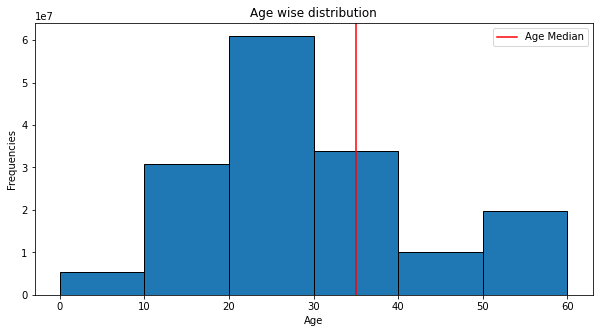

In [29]:
#plot age distribution and median age
ages=master_data['Age']
bin = [0, 10, 20, 30, 40, 50, 60]
plt.figure(figsize=(10,5))
plt.hist(ages,bins=bin,edgecolor='black')
plt.axvline(35,color='red',label='Age Median')
plt.xlabel('Age')
plt.ylabel('Frequencies')
plt.title('Age wise distribution')
plt.legend()
plt.show()


# Most people in survey are in age group 20-30 while median age was 35 years

In [30]:
# Rating of movie
master_data.loc[1]

,Title,UserID,Rating,Age,Occupation
1,Toy Story (1995),2599,4,1,10
1,Toy Story (1995),2599,4,1,10
1,Toy Story (1995),2599,4,1,10
1,Toy Story (1995),2599,4,1,10
1,Toy Story (1995),2599,4,1,10
...,...,...,...,...,...
1,Toy Story (1995),4818,4,1,10
1,Toy Story (1995),4818,4,1,10
1,Toy Story (1995),4818,4,1,10
1,Toy Story (1995),4818,4,1,10


In [31]:
Movie1=data1.loc[1]

In [32]:
Movie1.describe()

,UserID,Rating
count,2077.000000,2077.000000
mean,3053.819933,4.146846
std,1750.606746,0.852349
min,1.000000,1.000000
25%,1532.000000,4.000000
50%,3146.000000,4.000000
75%,4571.000000,5.000000
max,6040.000000,5.000000


In [33]:
# top 25 rated movies

In [34]:
title=master_data['Title']
rating=master_data['Rating']

In [35]:
master_data.groupby(['Title'])[['Rating']].mean()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000


In [36]:
movies_rating_list=master_data.groupby(['Title'])[['Rating']].mean()

In [37]:
movies_rating_list=movies_rating_list.reset_index()

In [38]:
movies_rating_list.nlargest(25, ['Rating'])

,Title,Rating
249,"Baby, The (1973)",5.000000
407,Bittersweet Motel (2000),5.000000
1203,Follow the Bitch (1998),5.000000
1297,"Gate of Heavenly Peace, The (1995)",5.000000
2025,Lured (1947),5.000000
2453,One Little Indian (1973),5.000000
2903,Schlafes Bruder (Brother of Sleep) (1995),5.000000
3044,Smashing Time (1967),5.000000
3087,Song of Freedom (1936),5.000000
3477,Ulysses (Ulisse) (1954),5.000000


In [39]:
sorted_list=movies_rating_list.sort_values(by='Rating',ascending=False)

In [40]:
sorted_list=sorted_list.reset_index()

In [41]:
sorted_list[sorted_list['Title'] == 'Toy Story (1995)'].index.tolist()

[202]

# 1. By average ratings we can see above are the 25 movies in data set ref.Out[52]: 

# 2.Movie 'Toy Story(1995)' has min rating of 1 and max of 5 while average rating was 4.146846. It stands 202 in the list.

In [42]:
# Finding data for User:2696  
data1_mod=data1.reset_index()

In [43]:
data1_mod

,MovieID,Title,UserID,Rating
0,1,Toy Story (1995),2599,4
1,1,Toy Story (1995),18,4
2,1,Toy Story (1995),4089,5
3,1,Toy Story (1995),3626,4
4,1,Toy Story (1995),2873,5
...,...,...,...,...
1000204,3952,"Contender, The (2000)",551,4
1000205,3952,"Contender, The (2000)",1544,4
1000206,3952,"Contender, The (2000)",1130,3
1000207,3952,"Contender, The (2000)",238,4


In [44]:
filt=data1_mod.loc[(data1_mod['UserID']==2696)];filt

,MovieID,Title,UserID,Rating
95249,350,"Client, The (1994)",2696,3
200434,800,Lone Star (1996),2696,5
270087,1092,Basic Instinct (1992),2696,4
274557,1097,E.T. the Extra-Terrestrial (1982),2696,3
349226,1258,"Shining, The (1980)",2696,4
361544,1270,Back to the Future (1985),2696,2
448152,1589,Cop Land (1997),2696,3
458441,1617,L.A. Confidential (1997),2696,4
459863,1625,"Game, The (1997)",2696,4
464585,1644,I Know What You Did Last Summer (1997),2696,2


In [45]:
filt.shape

(20, 4)

In [46]:
Movie=filt['Title'];Rating=filt['Rating']

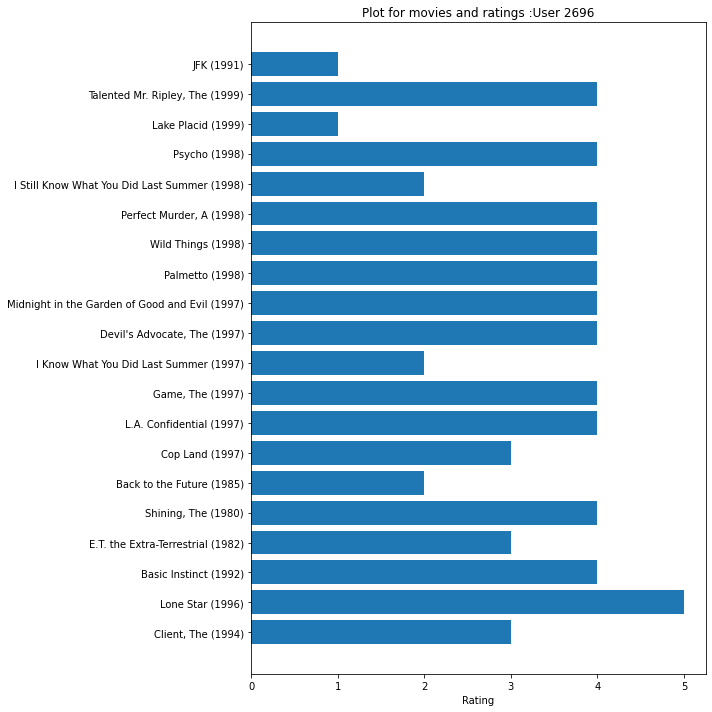

In [47]:
# plot for user 2696

plt.figure(figsize=(10,10))
plt.barh(Movie, Rating)

plt.title("Plot for movies and ratings :User 2696")
plt.xlabel("Rating")

plt.tight_layout()

plt.show()


In [48]:
data2_mod.loc[2696].value_counts()

Age  Occupation
25   7             20
dtype: int64

In [51]:
users_df.loc[2696]

Gender            M
Age              25
Occupation        7
Zip-code      24210
Name: 2696, dtype: object

# User 2696 is a Male of 25 years ,address (Zip-code=24210) has participated in survey giving rating for 20 movies. His favourite movie is Lone Star (1996) as he rated it 5 while least favourite are Lake Placid (1999) and JFK (1991) with worst rating of 1